In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# **Univariate Analysis**

In [3]:
superstore_data = pd.read_csv('train.csv')

In [4]:
#Understanding the Dataset
print(superstore_data.head())
print(superstore_data.info())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

**Data Cleaning**

In [5]:
#Checking for missing values
print(superstore_data.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [7]:
superstore_data = superstore_data.dropna()
#Handling Missing Values
print(superstore_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float

In [8]:
#Datatypes
print(superstore_data.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [10]:
#Converting Date and Time format
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

<ipython-input-10-1d15fc4f9d5d>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])


In [11]:
#Descriptive Statistics
print(superstore_data.describe())

            Row ID   Postal Code         Sales
count  9789.000000   9789.000000   9789.000000
mean   4896.705588  55273.322403    230.116193
std    2827.486899  32041.223413    625.302079
min       1.000000   1040.000000      0.444000
25%    2449.000000  23223.000000     17.248000
50%    4896.000000  58103.000000     54.384000
75%    7344.000000  90008.000000    210.392000
max    9800.000000  99301.000000  22638.480000


**Visualization**

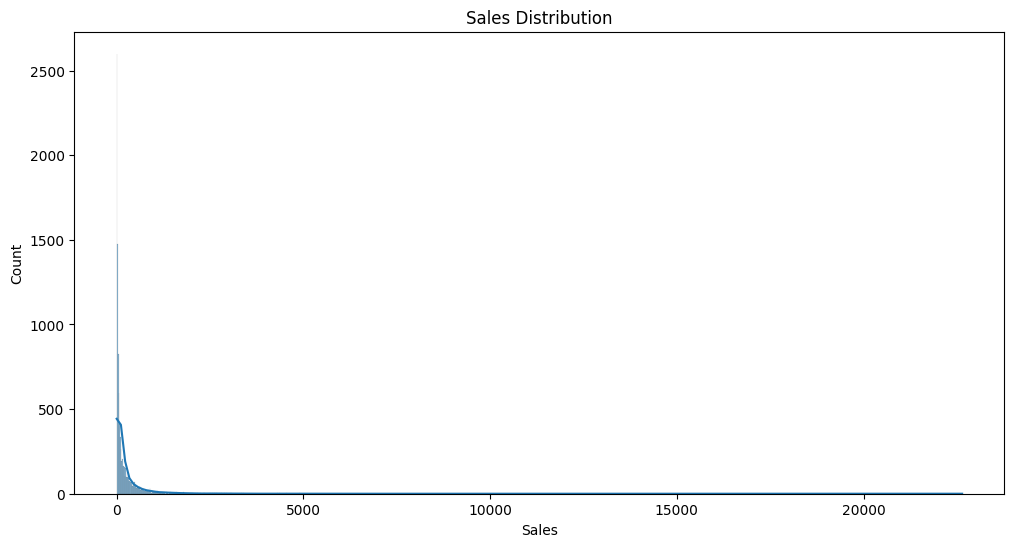

In [12]:
#Histogram
plt.figure(figsize=(12, 6))
sns.histplot(superstore_data['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

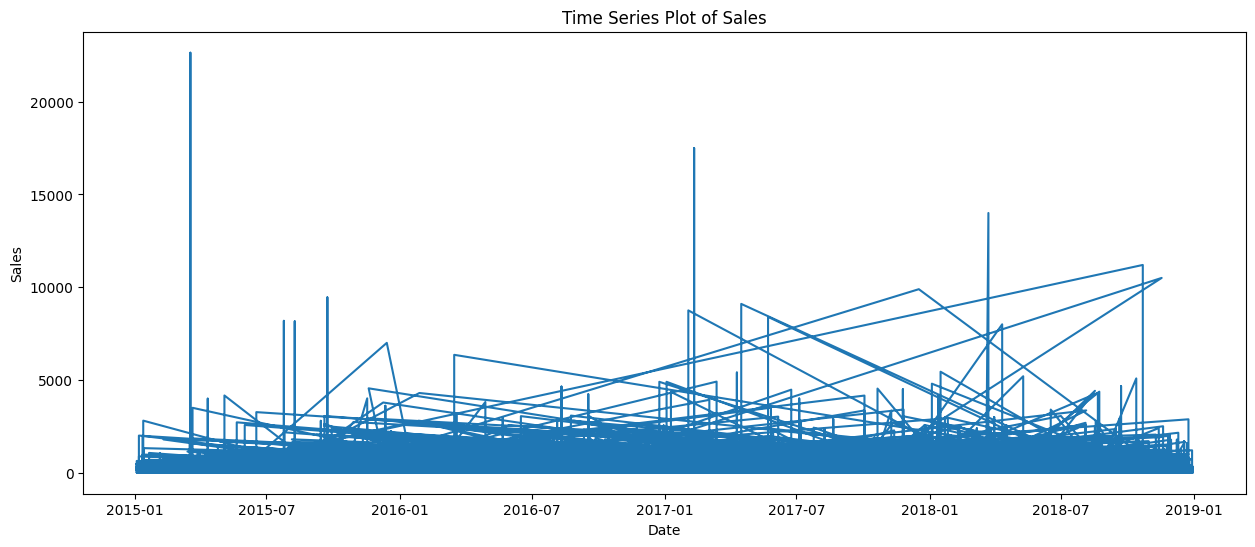

In [14]:
#Time Series Plot
plt.figure(figsize=(15, 6))
plt.plot(superstore_data['Order Date'], superstore_data['Sales'])
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

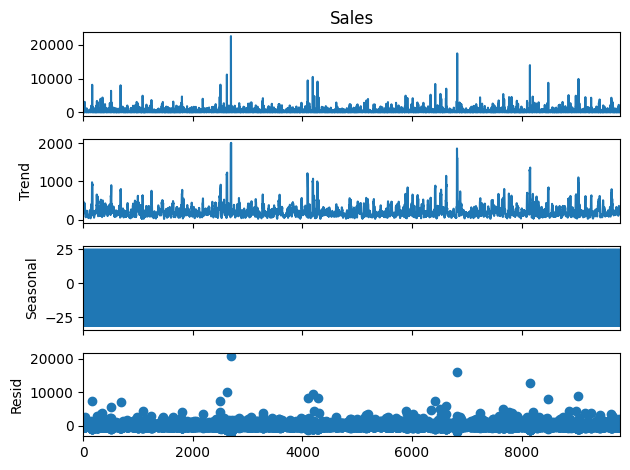

In [15]:
#Seasonal Decomposition
result = seasonal_decompose(superstore_data['Sales'], model='additive', period=12)
result.plot()
plt.show()

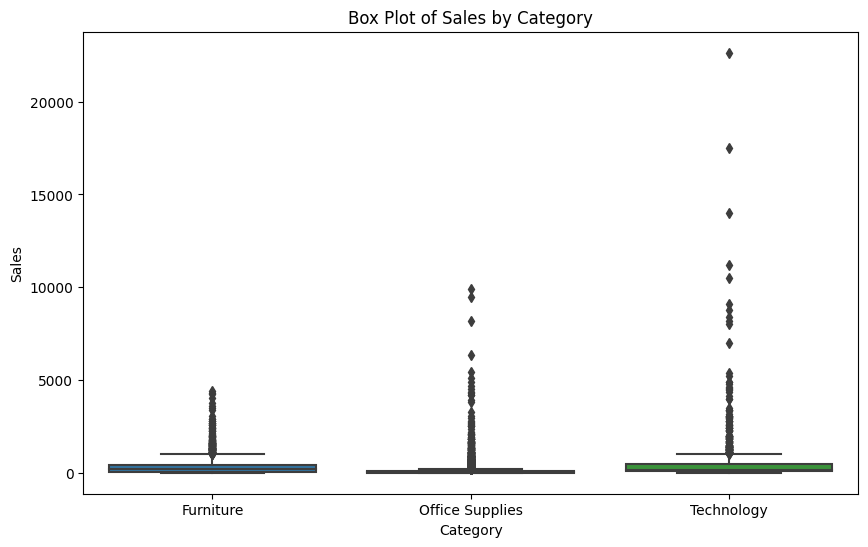

In [16]:
#Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=superstore_data['Category'], y=superstore_data['Sales'])
plt.title('Box Plot of Sales by Category')
plt.show()

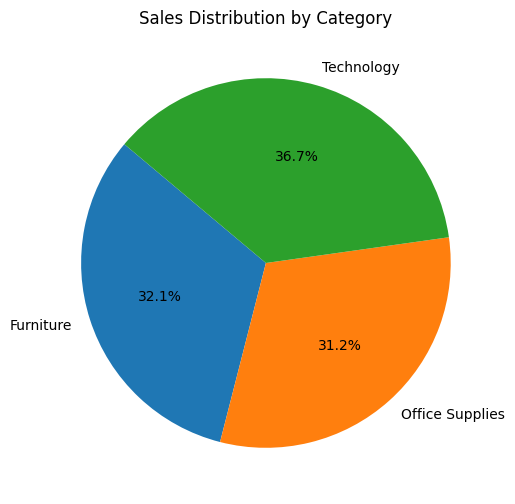

In [17]:
#Sales Distribution by Category
category_sales = superstore_data.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Category')
plt.show()

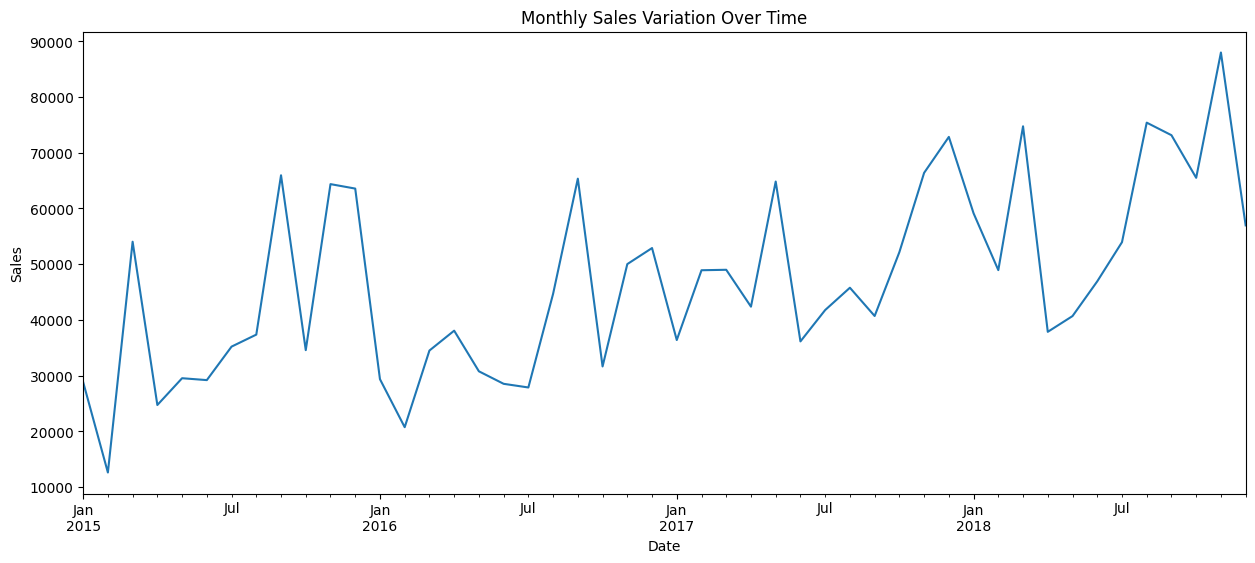

In [18]:
#Sales Variation over Time
monthly_sales = superstore_data.resample('M', on='Order Date')['Sales'].sum()
plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

**Bivariate Analysis**

In [19]:
#Correlation Matrix
correlation_matrix = superstore_data.corr()
print(correlation_matrix)

               Row ID  Postal Code     Sales
Row ID       1.000000     0.013645 -0.000434
Postal Code  0.013645     1.000000 -0.024067
Sales       -0.000434    -0.024067  1.000000


<ipython-input-19-b772e79780cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = superstore_data.corr()


**Visualization**

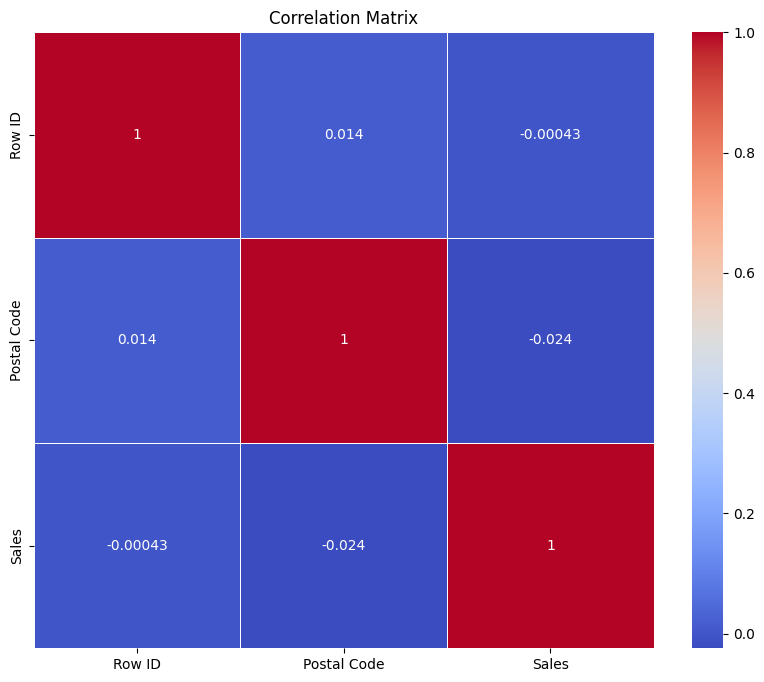

In [20]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

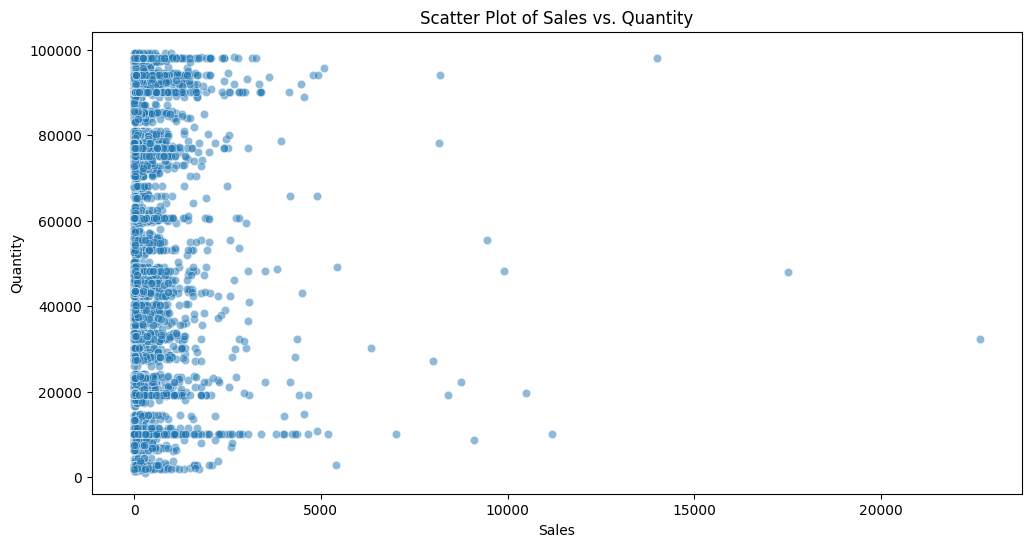

In [23]:
#Scatter Plot done with Sales and Postal Code
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sales', y='Postal Code', data=superstore_data, alpha=0.5)
plt.title('Scatter Plot of Sales vs. Quantity')
plt.xlabel('Sales')
plt.ylabel('Quantity')
plt.show()

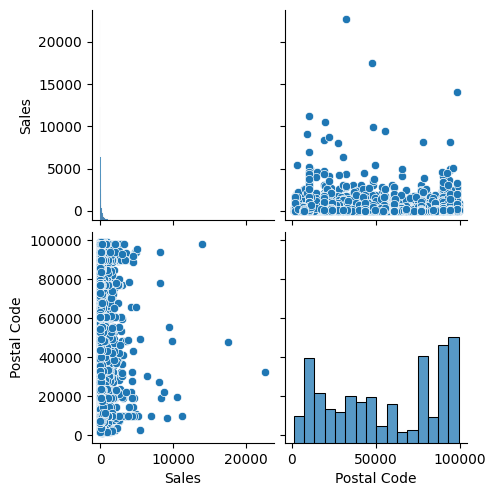

In [25]:
#Pair plot done with Sales and Postal Code
sns.pairplot(superstore_data[['Sales', 'Postal Code']])
plt.show()

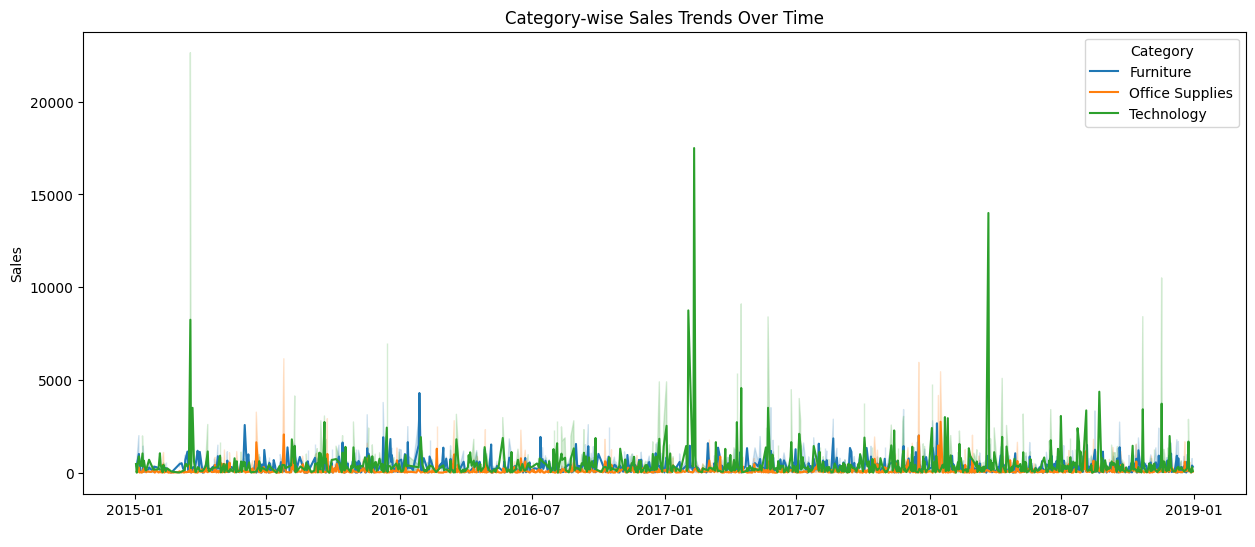

In [26]:
#Category-wise Sales Trends
plt.figure(figsize=(15, 6))
sns.lineplot(x='Order Date', y='Sales', hue='Category', data=superstore_data)
plt.title('Category-wise Sales Trends Over Time')
plt.show()

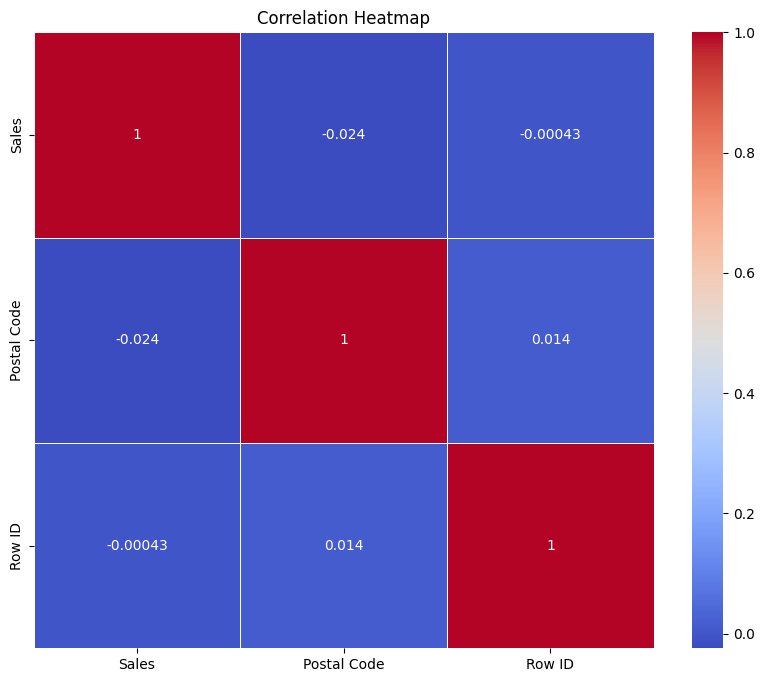

In [29]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(superstore_data[['Sales', 'Postal Code','Row ID']].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

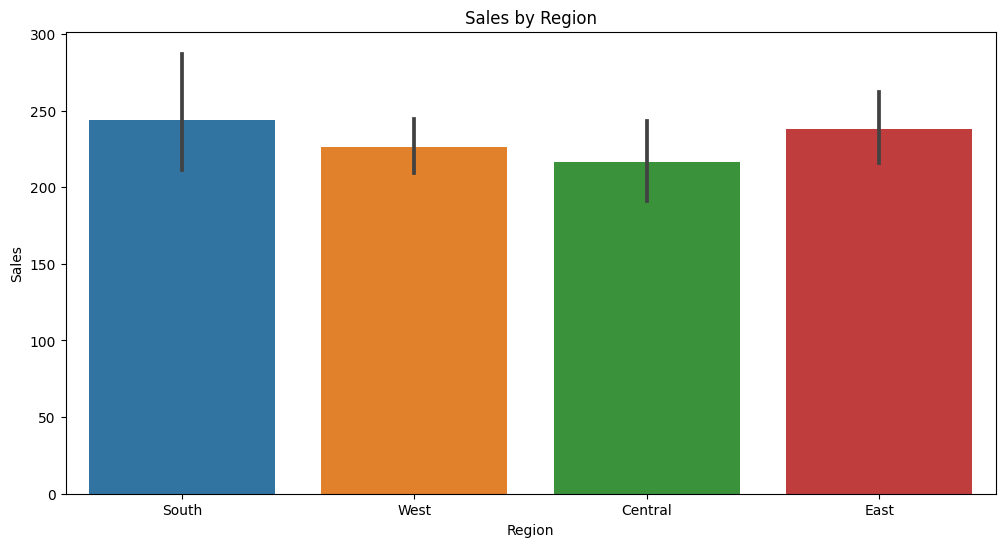

In [30]:
#Sales by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=superstore_data)
plt.title('Sales by Region')
plt.show()

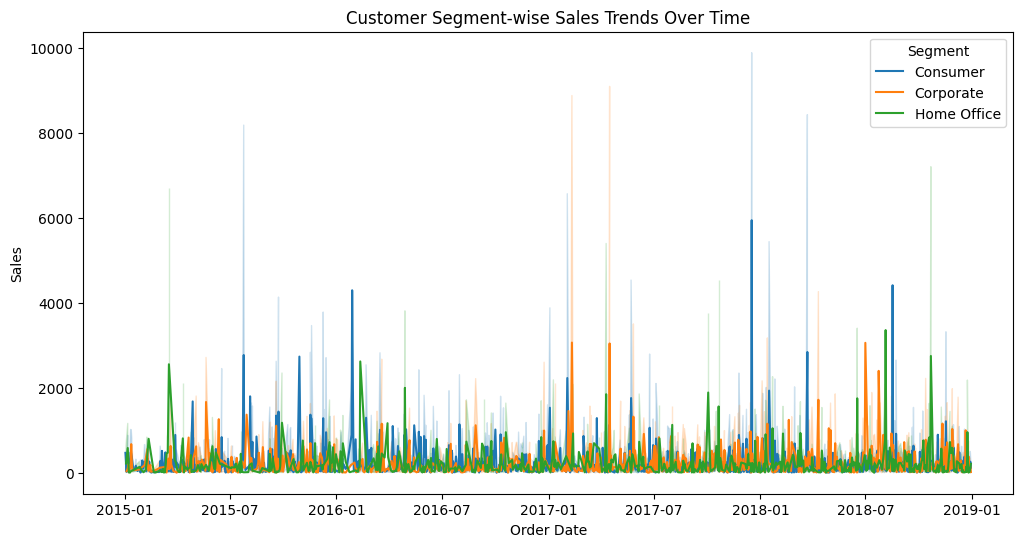

In [32]:
#Customer Segment Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', hue='Segment', data=superstore_data)
plt.title('Customer Segment-wise Sales Trends Over Time')
plt.show()

In [48]:
superstore_data.assign(quantity=superstore_data['Sales'])

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,quantity
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,261.9600
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,731.9400
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,14.6200
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,957.5775
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,3.7980
9796,9797,CA-2016-128608,2016-12-01,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,10.3680
9797,9798,CA-2016-128608,2016-12-01,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,235.1880
9798,9799,CA-2016-128608,2016-12-01,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,26.3760


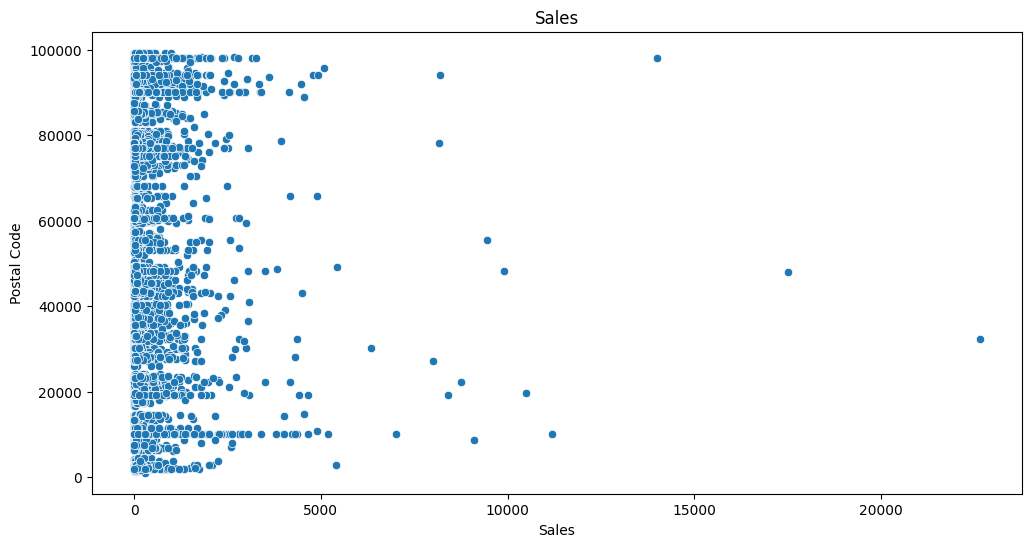

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sales', y='Postal Code', data=superstore_data)
plt.title('Sales')
plt.show()

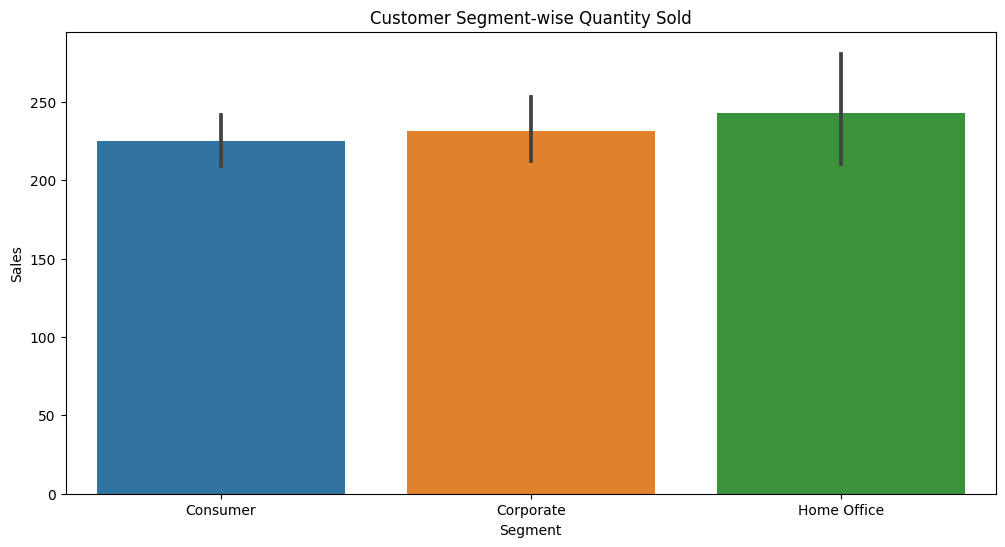

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Sales', data=superstore_data)
plt.title('Customer Segment-wise Quantity Sold')
plt.show()

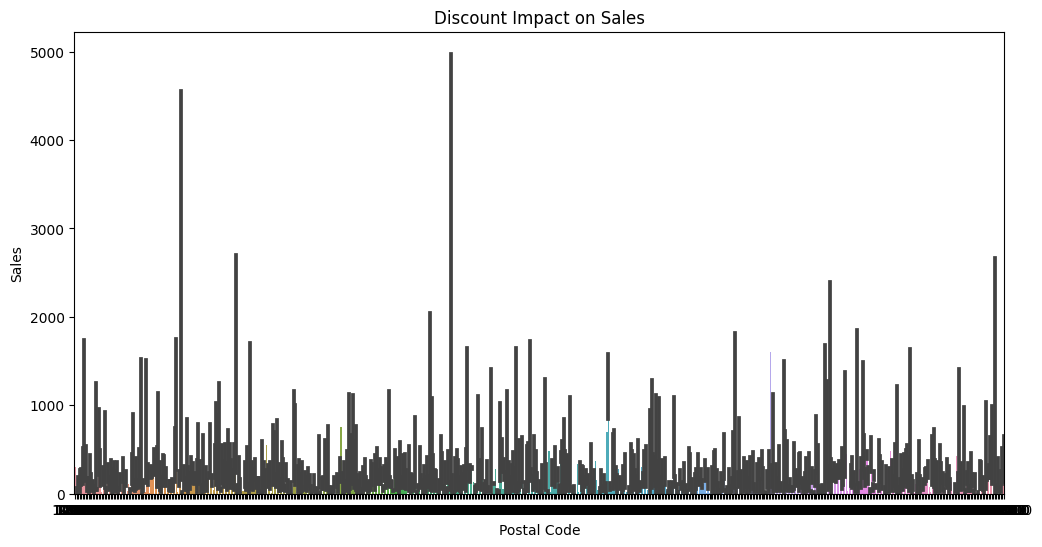

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Postal Code', y='Sales', data=superstore_data)
plt.title('Discount Impact on Sales')
plt.show()

<Figure size 1200x600 with 0 Axes>

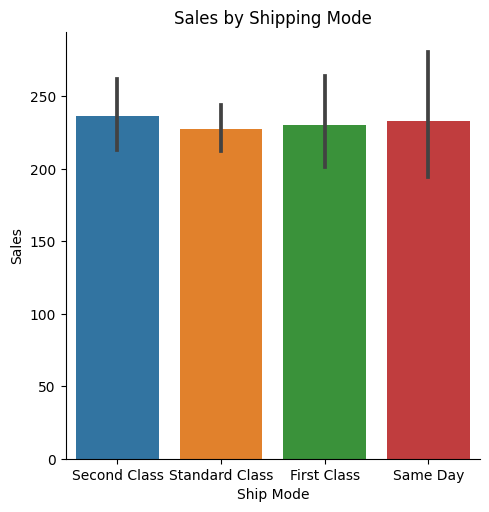

In [54]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Ship Mode', y='Sales', kind='bar', data=superstore_data)
plt.title('Sales by Shipping Mode')
plt.show()

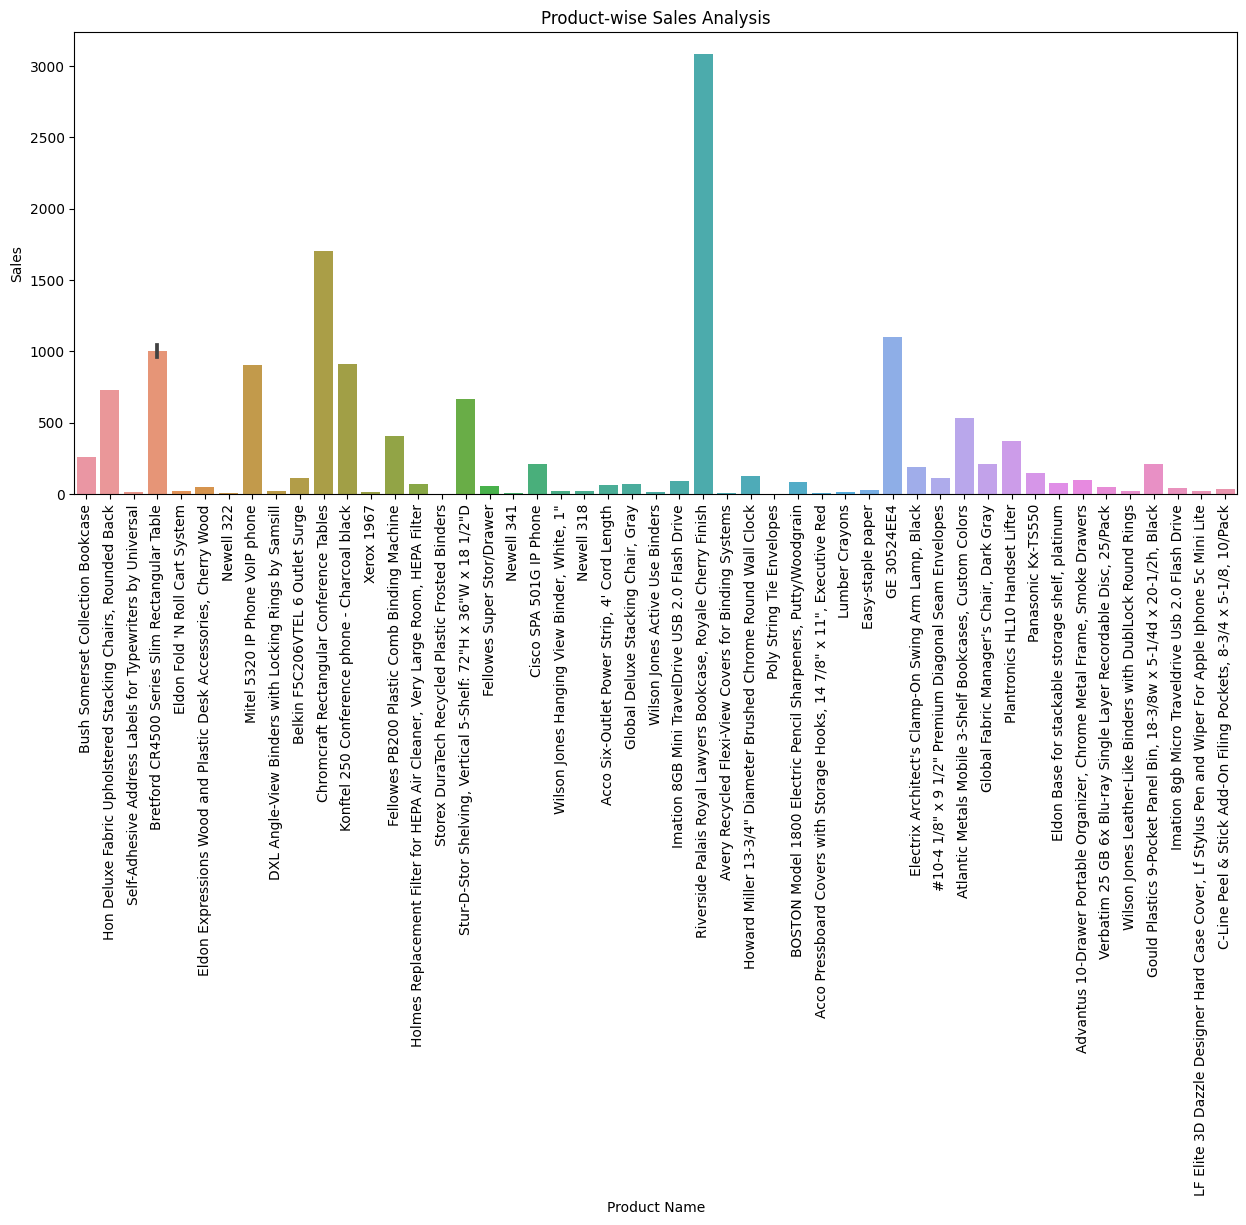

In [55]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Product Name', y='Sales', data=superstore_data.head(50))  # Displaying top 50 products for clarity
plt.title('Product-wise Sales Analysis')
plt.xticks(rotation=90)
plt.show()

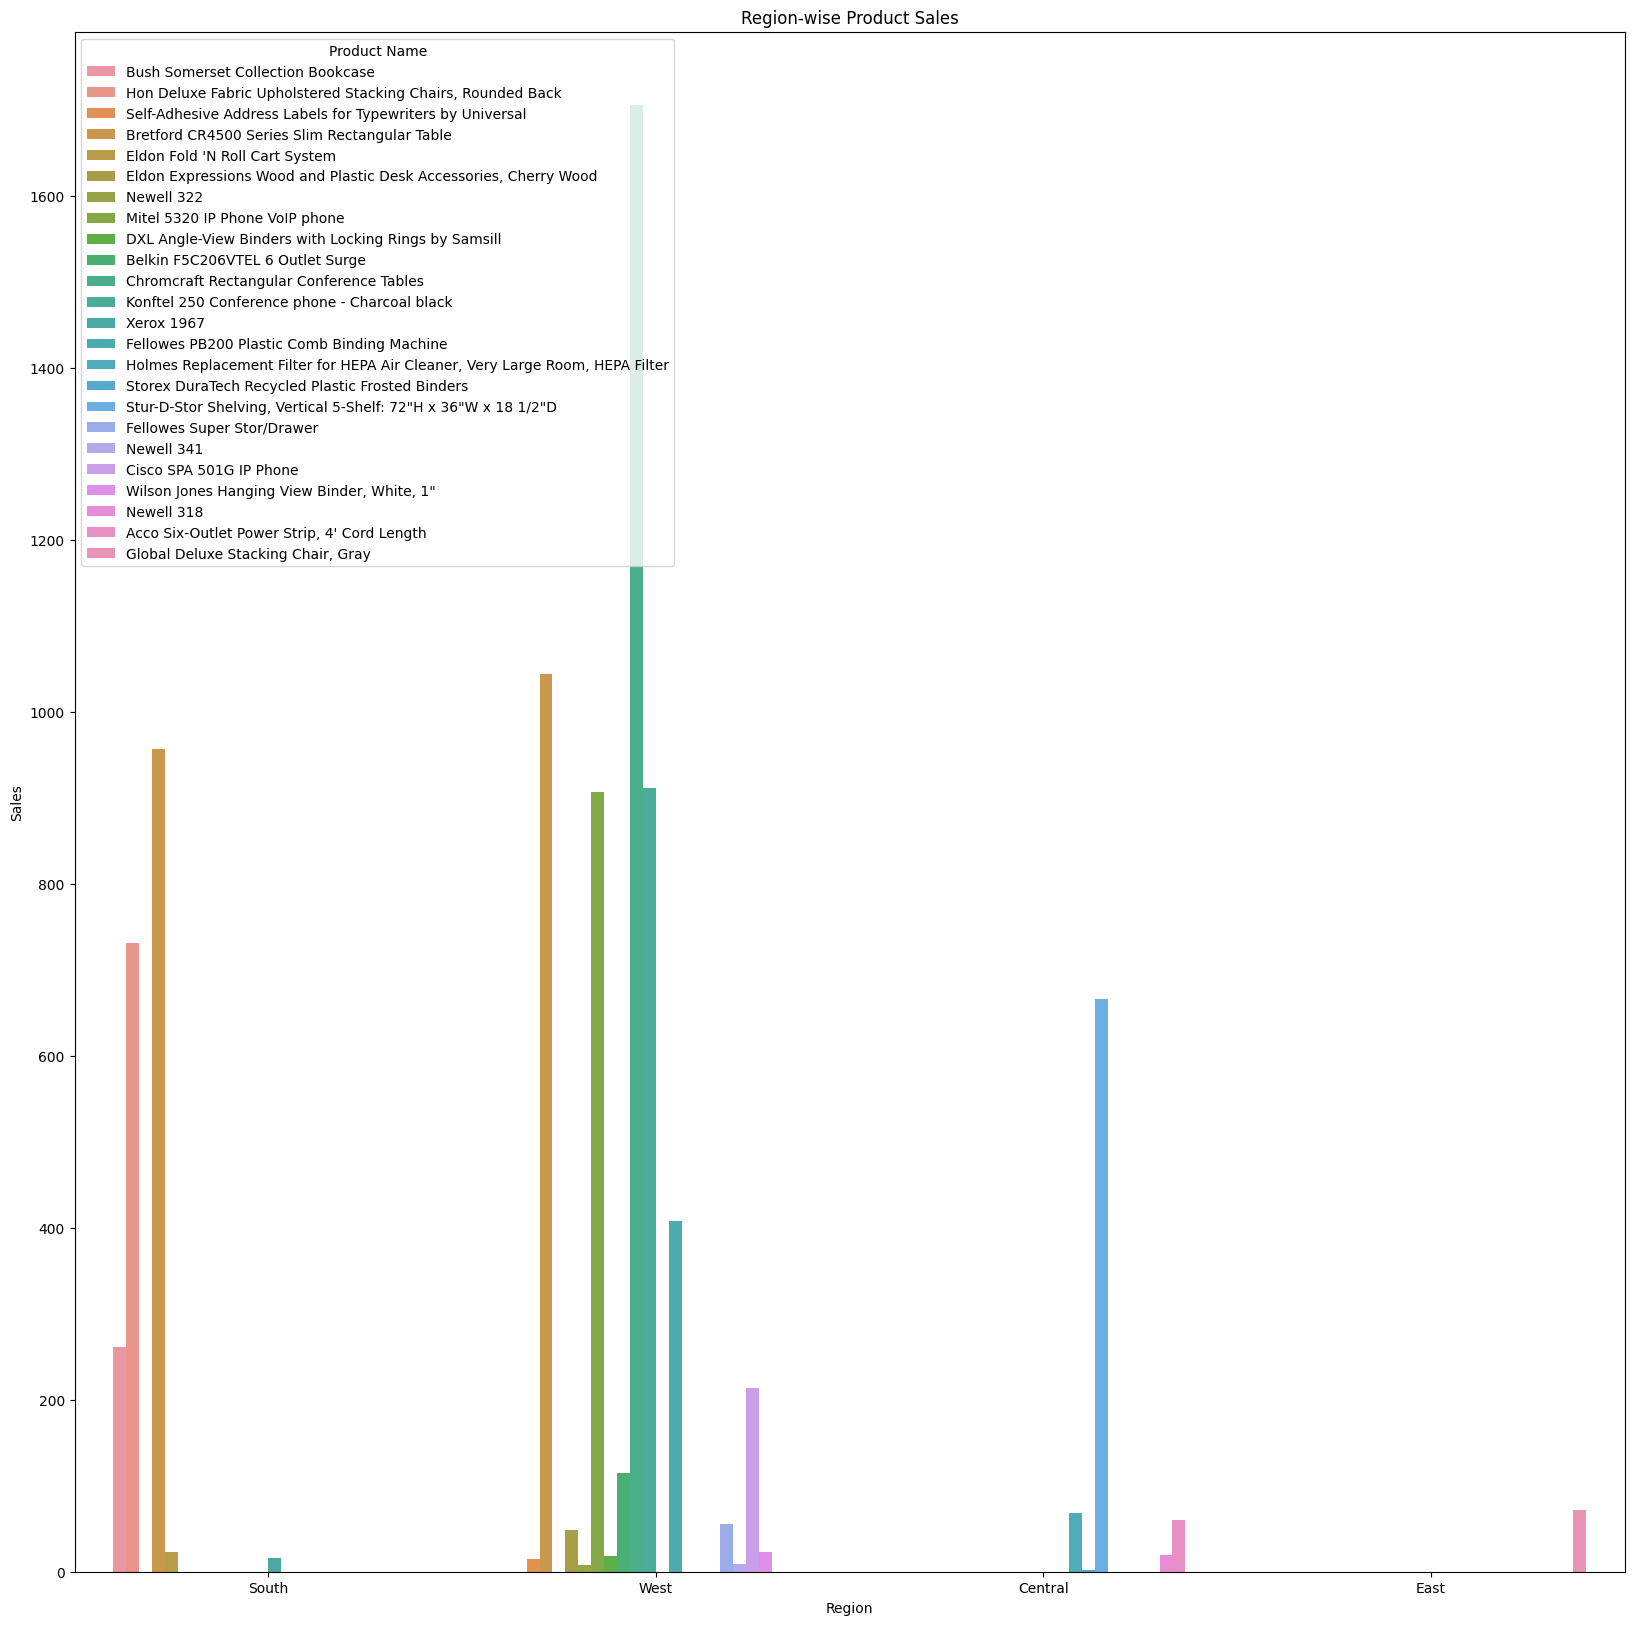

In [59]:
plt.figure(figsize=(20, 20))
sns.barplot(x='Region', y='Sales', hue='Product Name', data=superstore_data.head(25))
plt.title('Region-wise Product Sales')
plt.show()